In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
import pandas as pd


In [2]:
data = load_iris()

In [3]:
# Generate synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
#                          n_redundant=5, n_classes=3, random_state=42)

X = data.data
y = data.target

In [4]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
X_train

tensor([[0.0882, 0.6667, 0.0000, 0.0417],
        [0.4118, 1.0000, 0.0877, 0.1250],
        [0.7059, 0.4583, 0.5965, 0.5417],
        [0.1471, 0.5833, 0.1053, 0.0417],
        [0.0294, 0.5000, 0.0526, 0.0417],
        [0.5882, 0.2083, 0.7018, 0.7500],
        [0.6176, 0.5000, 0.6140, 0.5833],
        [0.2647, 0.6250, 0.0877, 0.0417],
        [0.2059, 0.6667, 0.0702, 0.0417],
        [0.2647, 0.8750, 0.0877, 0.0000],
        [0.4412, 0.2917, 0.7193, 0.7500],
        [0.5000, 0.5833, 0.6140, 0.6250],
        [0.7059, 0.4583, 0.6491, 0.5833],
        [0.3235, 0.7917, 0.0526, 0.1250],
        [0.3235, 0.7083, 0.0877, 0.0417],
        [0.3529, 0.1667, 0.4737, 0.3750],
        [0.5882, 0.3333, 0.7193, 0.5833],
        [0.6176, 0.4583, 0.7895, 0.7083],
        [0.6765, 0.4167, 0.5965, 0.5417],
        [0.8529, 0.6667, 0.8947, 1.0000],
        [0.4118, 0.3750, 0.5614, 0.5000],
        [0.9706, 0.4167, 0.9825, 0.8333],
        [0.3824, 0.4167, 0.6140, 0.5833],
        [0.2353, 0.6250, 0.0702, 0

In [7]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], num_classes)
        self.relu = nn.ReLU()    
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
verified_model = ANN(input_size=4, hidden_sizes=[64, 32], num_classes=3)

In [9]:
# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(verified_model.parameters(), lr=0.001)

In [10]:
# Training loop
epochs = 30
for epoch in range(epochs):
    verified_model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = verified_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss/len(train_loader):.4f}')

Epoch [5/30], Loss: 1.0440
Epoch [10/30], Loss: 0.9407
Epoch [15/30], Loss: 0.7983
Epoch [20/30], Loss: 0.6286
Epoch [25/30], Loss: 0.4928
Epoch [30/30], Loss: 0.4063


In [11]:
# Evaluation
verified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = verified_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

verified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = verified_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 90.00%
Train Accuracy: 89.17%


In [12]:
activations = {}
def get_activation(name, storage_dict):
    def hook(model, input, output):
        storage_dict[name] = output.detach()
    return hook

verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

In [13]:
calibration_data = X_train[0]

# Get verified activations from original model
verified_model.eval()
with torch.no_grad():
    _ = verified_model(calibration_data)
    target_activations = {k: v.clone() for k, v in activations.items()}

real_activations = target_activations.copy()

# ADVERSARY SETUP

In [14]:
def crack_input(target_output, model, learning_rate=0.005, iterations=10000):
    # Initialize random input (3 features)
    input_tensor = torch.rand(1, 4, requires_grad=True)
    optimizer = torch.optim.Adam([input_tensor], lr=learning_rate)
    
    losses = []
    for i in range(iterations): 
        optimizer.zero_grad()
    
        # Forward pass
        predicted_output = model(input_tensor)
        
        # Compute loss
        loss = F.mse_loss(predicted_output, target_output)
        losses.append(loss.item())
        
        # Backward pass
        loss.backward()
        
        # Update inputs
        optimizer.step()
        
        # Optional: print progress if loss zero hack is successful!!
        if i % 1000 == 0:
            print(f"Iteration {i}, Loss: {loss.item():.6f}")

        if loss.item() < 1e-6:
            print("Loss is very low, stoped early.")
            break
    return input_tensor.detach()

In [15]:
pred_inputs = crack_input(real_activations['fc3'], verified_model, learning_rate=0.001, iterations=100000)

Iteration 0, Loss: 4.863929


C:\Users\hskay\AppData\Local\Temp\ipykernel_23884\3400766572.py:14: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(predicted_output, target_output)


Iteration 1000, Loss: 0.001012
Iteration 2000, Loss: 0.000869
Iteration 3000, Loss: 0.000719
Iteration 4000, Loss: 0.000544
Iteration 5000, Loss: 0.000384
Iteration 6000, Loss: 0.000272
Iteration 7000, Loss: 0.000202
Iteration 8000, Loss: 0.000155
Iteration 9000, Loss: 0.000136
Iteration 10000, Loss: 0.000104
Iteration 11000, Loss: 0.000067
Iteration 12000, Loss: 0.000058
Iteration 13000, Loss: 0.000025
Iteration 14000, Loss: 0.000008
Iteration 15000, Loss: 0.000004
Loss is very low, stoped early.


Layer fc1 - Mean Absolute Difference: 0.137795
Layer fc1 - Max Absolute Difference: 0.302021


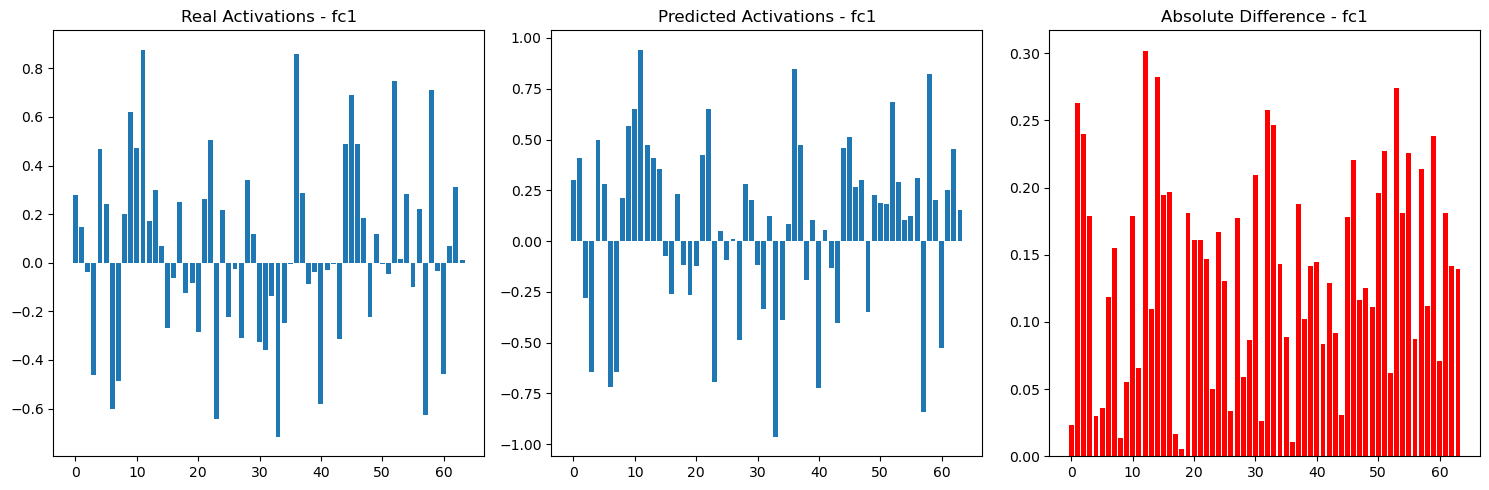

Layer fc2 - Mean Absolute Difference: 0.084583
Layer fc2 - Max Absolute Difference: 0.305369


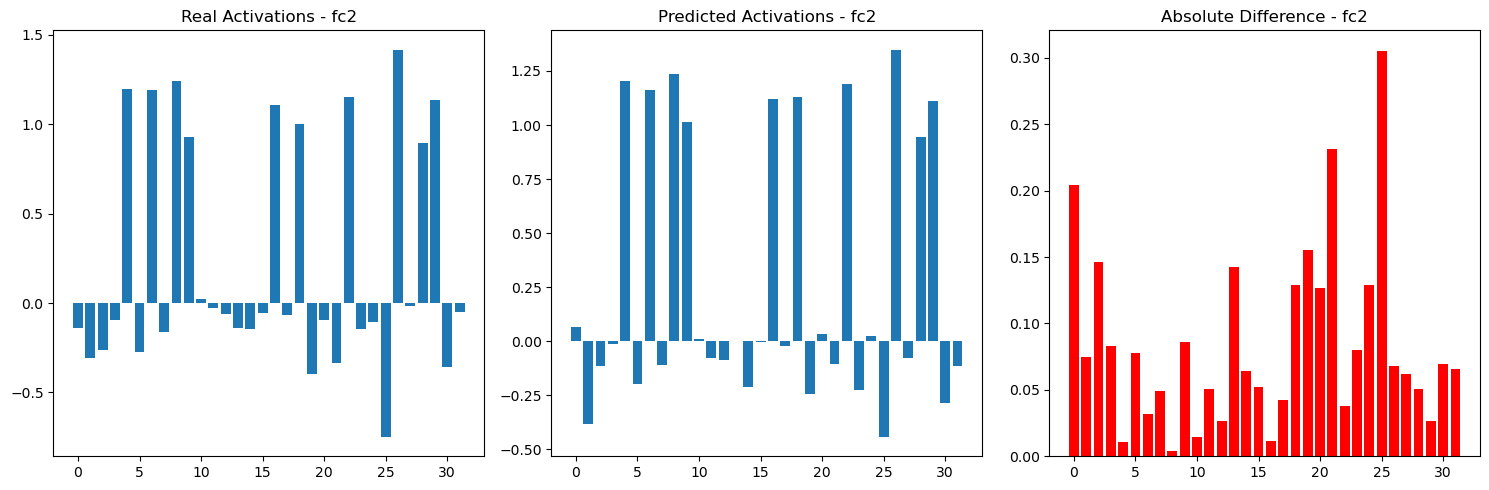

Layer fc3 - Mean Absolute Difference: 0.000832
Layer fc3 - Max Absolute Difference: 0.001290


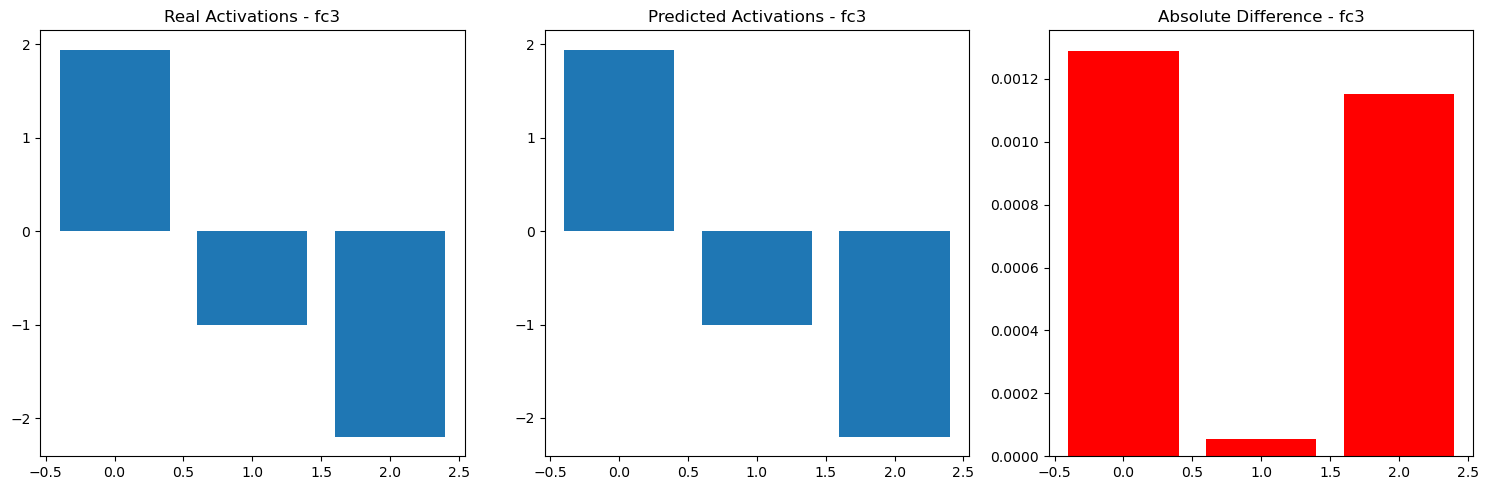

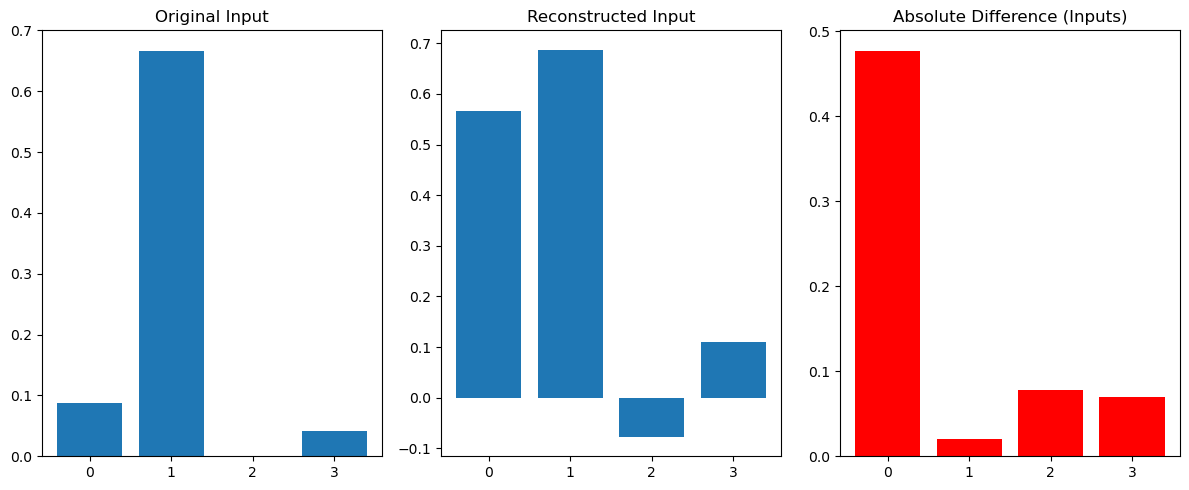

Input - Mean Absolute Difference: 0.161226
Input - Max Absolute Difference: 0.477287


In [16]:
activations = {}
verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

calibration_data = pred_inputs

# Get verified activations from original model
verified_model.eval()
with torch.no_grad():
    _ = verified_model(calibration_data)
    pred_activations = {k: v.clone() for k, v in activations.items()}

# Compare and visualize the activations using absolute difference
for layer in real_activations.keys():
    # Calculate mean absolute error between real and predicted activations
    abs_diff = torch.abs(real_activations[layer] - pred_activations[layer])
    mean_abs_diff = abs_diff.mean().item()
    max_abs_diff = abs_diff.max().item()
    
    print(f"Layer {layer} - Mean Absolute Difference: {mean_abs_diff:.6f}")
    print(f"Layer {layer} - Max Absolute Difference: {max_abs_diff:.6f}")
    
    # Create visualization
    plt.figure(figsize=(15, 5))
    
    # Plot real activations
    plt.subplot(1, 3, 1)
    plt.title(f"Real Activations - {layer}")
    plt.bar(range(len(real_activations[layer].flatten())), 
            real_activations[layer].flatten().numpy())
    
    # Plot predicted activations
    plt.subplot(1, 3, 2)
    plt.title(f"Predicted Activations - {layer}")
    plt.bar(range(len(pred_activations[layer].flatten())), 
            pred_activations[layer].flatten().numpy())
    
    # Plot absolute differences
    plt.subplot(1, 3, 3)
    plt.title(f"Absolute Difference - {layer}")
    plt.bar(range(len(abs_diff.flatten())), 
            abs_diff.flatten().numpy(),
            color='red')
    
    plt.tight_layout()
    plt.savefig(f"activation_comparison_{layer}_first_input3.png")
    plt.show()

# Also compare the original input with the reconstructed input
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Original Input")
plt.bar(range(len(X_train[0])), X_train[0].numpy())

plt.subplot(1, 3, 2)
plt.title("Reconstructed Input")
plt.bar(range(len(pred_inputs.flatten())), pred_inputs.flatten().numpy())

# Show absolute difference between inputs
plt.subplot(1, 3, 3)
plt.title("Absolute Difference (Inputs)")
input_abs_diff = torch.abs(X_train[0] - pred_inputs.flatten())
plt.bar(range(len(input_abs_diff)), input_abs_diff.numpy(), color='red')

plt.tight_layout()
plt.savefig(f"input_comparison_first_input2.png")
plt.show()

# Print summary statistics for inputs
mean_input_diff = input_abs_diff.mean().item()
max_input_diff = input_abs_diff.max().item()
print(f"Input - Mean Absolute Difference: {mean_input_diff:.6f}")
print(f"Input - Max Absolute Difference: {max_input_diff:.6f}")

# MULTIPLE INPUT with N ROUND

In [17]:
ROUND = 3
N_INPUTS = 50
results = pd.DataFrame(columns=[
    'input_id', 'round_id', 
    'fc1_min_abs_diff', 'fc1_max_abs_diff', 'fc1_mean_abs_diff',
    'fc2_min_abs_diff', 'fc2_max_abs_diff', 'fc2_mean_abs_diff',
    'fc3_min_abs_diff', 'fc3_max_abs_diff', 'fc3_mean_abs_diff',
    'real_input', "pred_input"
])
for i in range(N_INPUTS):
    print(f"Input {i+1}")
    for j in range(ROUND):
        print(f"Round {j+1}")

        # Registering hooks to capture activations
        activations = {}
        verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
        verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
        verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

        calibration_data = X_train[i]

        # Get verified activations from original model
        verified_model.eval()
        with torch.no_grad():
            _ = verified_model(calibration_data)
            target_activations = {k: v.clone() for k, v in activations.items()}

        real_activations = target_activations.copy()


        # ADVERSARIAL INPUT GENERATION
        pred_inputs = crack_input(real_activations['fc3'], verified_model, learning_rate=0.005, iterations=10000)

        # Registering hooks to capture activations
        activations = {}
        verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
        verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
        verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

        calibration_data = pred_inputs

        # ACTIVATIONS that ADVERSARIAL INPUT GENERATED
        verified_model.eval()
        with torch.no_grad():
            _ = verified_model(calibration_data)
            pred_activations = {k: v.clone() for k, v in activations.items()}

        round_results = {'input_id': i+1, 'round_id': j+1}
        
        # Compare and visualize the activations using absolute difference
        for layer in real_activations.keys():

            # Calculate mean absolute error between real and predicted activations
            abs_diff = torch.abs(real_activations[layer] - pred_activations[layer])
            mean_abs_diff = abs_diff.mean().item()
            max_abs_diff = abs_diff.max().item()
            min_abs_diff = abs_diff.min().item()

            # Store in results dictionary
            round_results[f'{layer}_min_abs_diff'] = min_abs_diff
            round_results[f'{layer}_max_abs_diff'] = max_abs_diff
            round_results[f'{layer}_mean_abs_diff'] = mean_abs_diff

        # Append results to DataFrame
        round_results['real_input'] = X_train[i].flatten().numpy().tolist()
        round_results['pred_input'] = pred_inputs.flatten().numpy().tolist()
        results = pd.concat([results, pd.DataFrame([round_results])], ignore_index=True)
        
            
results.to_csv('activation_diff_results2.csv', index=False)




Input 1
Round 1
Iteration 0, Loss: 1.723822


C:\Users\hskay\AppData\Local\Temp\ipykernel_23884\3400766572.py:14: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(predicted_output, target_output)


Iteration 1000, Loss: 0.000119
Iteration 2000, Loss: 0.000052
Iteration 3000, Loss: 0.000032
Iteration 4000, Loss: 0.000026
Iteration 5000, Loss: 0.000020
Iteration 6000, Loss: 0.000014
Iteration 7000, Loss: 0.000008
Iteration 8000, Loss: 0.000003
Loss is very low, stoped early.
Round 2
Iteration 0, Loss: 8.562340


C:\Users\hskay\AppData\Local\Temp\ipykernel_23884\3219841291.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([round_results])], ignore_index=True)


Iteration 1000, Loss: 0.000889
Iteration 2000, Loss: 0.000412
Iteration 3000, Loss: 0.000169
Iteration 4000, Loss: 0.000081
Iteration 5000, Loss: 0.000032
Iteration 6000, Loss: 0.000010
Iteration 7000, Loss: 0.000009
Iteration 8000, Loss: 0.000008
Iteration 9000, Loss: 0.000005
Round 3
Iteration 0, Loss: 5.081336
Iteration 1000, Loss: 0.002664
Iteration 2000, Loss: 0.001432
Iteration 3000, Loss: 0.000442
Iteration 4000, Loss: 0.000135
Iteration 5000, Loss: 0.000044
Iteration 6000, Loss: 0.000010
Iteration 7000, Loss: 0.000007
Iteration 8000, Loss: 0.000006
Iteration 9000, Loss: 0.000006
Input 2
Round 1
Iteration 0, Loss: 7.589525
Iteration 1000, Loss: 0.000028
Iteration 2000, Loss: 0.000027
Iteration 3000, Loss: 0.000025
Iteration 4000, Loss: 0.000022
Iteration 5000, Loss: 0.000019
Iteration 6000, Loss: 0.000016
Iteration 7000, Loss: 0.000013
Iteration 8000, Loss: 0.000010
Iteration 9000, Loss: 0.000007
Round 2
Iteration 0, Loss: 10.917304
Iteration 1000, Loss: 0.001206
Iteration 2000,

C:\Users\hskay\AppData\Local\Temp\ipykernel_23884\2931628124.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=flat_data, palette=colors)
C:\Users\hskay\AppData\Local\Temp\ipykernel_23884\2931628124.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=flat_data, palette=colors)
C:\Users\hskay\AppData\Local\Temp\ipykernel_23884\2931628124.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=flat_data, palette=colors)


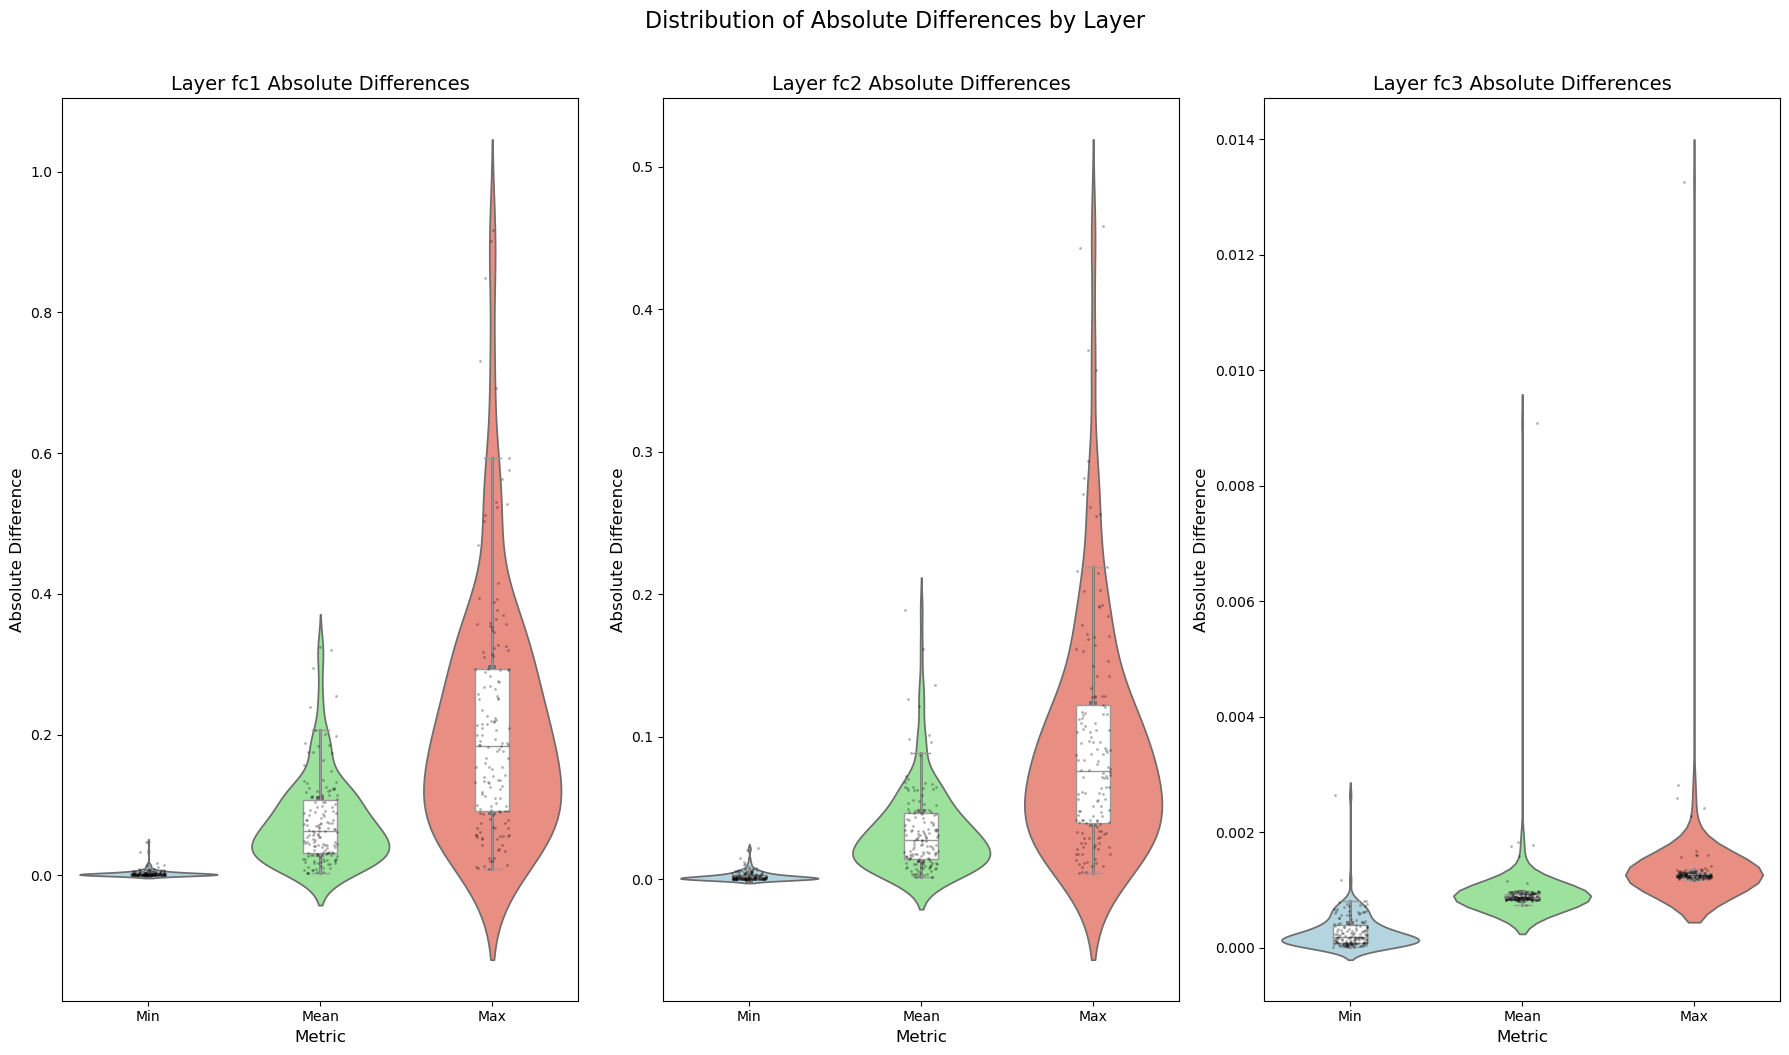

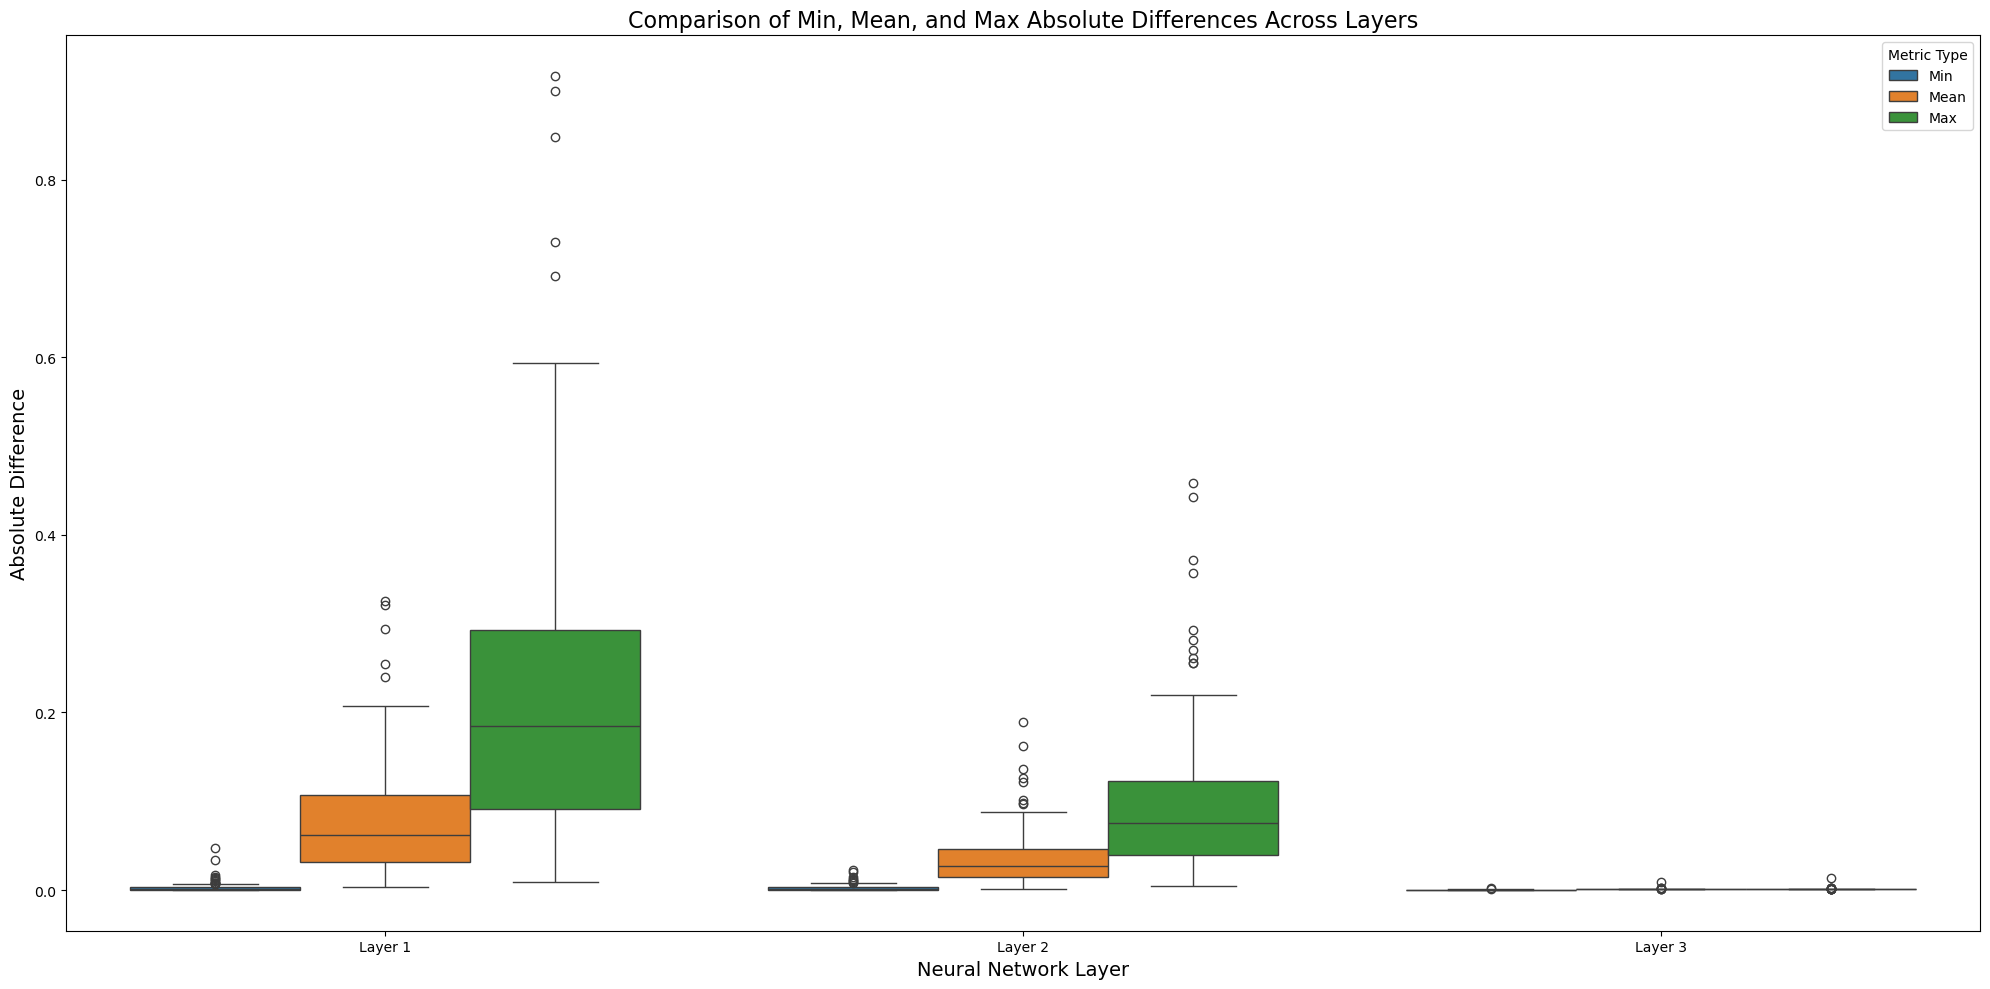

In [18]:

results = pd.DataFrame(pd.read_csv('activation_diff_results2.csv'))

# Create figure for distribution plots
plt.figure(figsize=(18, 10))

# Define the layers and metrics
layers = ['fc1', 'fc2', 'fc3']
metrics = ['min_abs_diff', 'mean_abs_diff', 'max_abs_diff']
metric_labels = ['Min', 'Mean', 'Max']
colors = ['lightblue', 'lightgreen', 'salmon']

# Create combined subplot for each layer
for i, layer in enumerate(layers, 1):
    plt.subplot(1, 3, i)
    
    # Prepare data for this layer
    data = []
    labels = []
    
    for metric, label in zip(metrics, metric_labels):
        column = f'{layer}_{metric}'
        data.append(results[column].values)
        labels.extend([label] * len(results[column]))
    
    # Flatten the data for plotting
    flat_data = np.concatenate(data)
    
    # Create category labels
    categories = np.repeat(metric_labels, len(results))
    
    # Create violin plot
    sns.violinplot(x=categories, y=flat_data, palette=colors)
    
    # Add box plot inside for more detail
    sns.boxplot(x=categories, y=flat_data, width=0.2, 
                color='white', showfliers=False, zorder=2)
    
    # Add individual points with jitter for better visibility
    sns.stripplot(x=categories, y=flat_data, size=2, 
                 color='black', alpha=0.3, jitter=True)
    
    # Set plot title and labels
    plt.title(f'Layer {layer} Absolute Differences', fontsize=14)
    plt.xlabel('Metric', fontsize=12)
    plt.ylabel('Absolute Difference', fontsize=12)
    
    # Set y-axis to log scale if the range is very wide
    if results[f'{layer}_max_abs_diff'].max() / results[f'{layer}_min_abs_diff'].min() > 100:
        #plt.yscale('log')
        plt.ylabel('Absolute Difference')# (log scale)', fontsize=12)

plt.tight_layout()
plt.suptitle('Distribution of Absolute Differences by Layer', fontsize=16, y=1.05)
plt.savefig('layer_differences_distribution3.png', bbox_inches='tight')
plt.show()

# Create a second figure with all metrics together for comparison
plt.figure(figsize=(20, 10))

# Prepare data for combined plot
all_data = []
all_labels = []
all_layer_labels = []

for layer in layers:
    for metric in metrics:
        column = f'{layer}_{metric}'
        all_data.append(results[column].values)
        all_labels.extend([f"{metric.split('_')[0].capitalize()}"] * len(results[column]))
        all_layer_labels.extend([f"Layer {layer.replace('fc', '')}"] * len(results[column]))

# Convert to arrays
all_data_flat = np.concatenate(all_data)
all_labels = np.array(all_labels)
all_layer_labels = np.array(all_layer_labels)

# Create DataFrame for seaborn
plot_df = pd.DataFrame({
    'Metric': all_labels,
    'Layer': all_layer_labels,
    'Value': all_data_flat
})

# Create the combined plot
sns.boxplot(x='Layer', y='Value', hue='Metric', data=plot_df)
plt.title('Comparison of Min, Mean, and Max Absolute Differences Across Layers', fontsize=16)
plt.xlabel('Neural Network Layer', fontsize=14)
plt.ylabel('Absolute Difference', fontsize=14)
plt.legend(title='Metric Type')

# Check if log scale is needed
if plot_df['Value'].max() / plot_df['Value'].min() > 100:
    #plt.yscale('log')
    plt.ylabel('Absolute Difference')# (log scale)', fontsize=14)

plt.tight_layout()
plt.savefig('combined_layer_differences3.png')
plt.show()


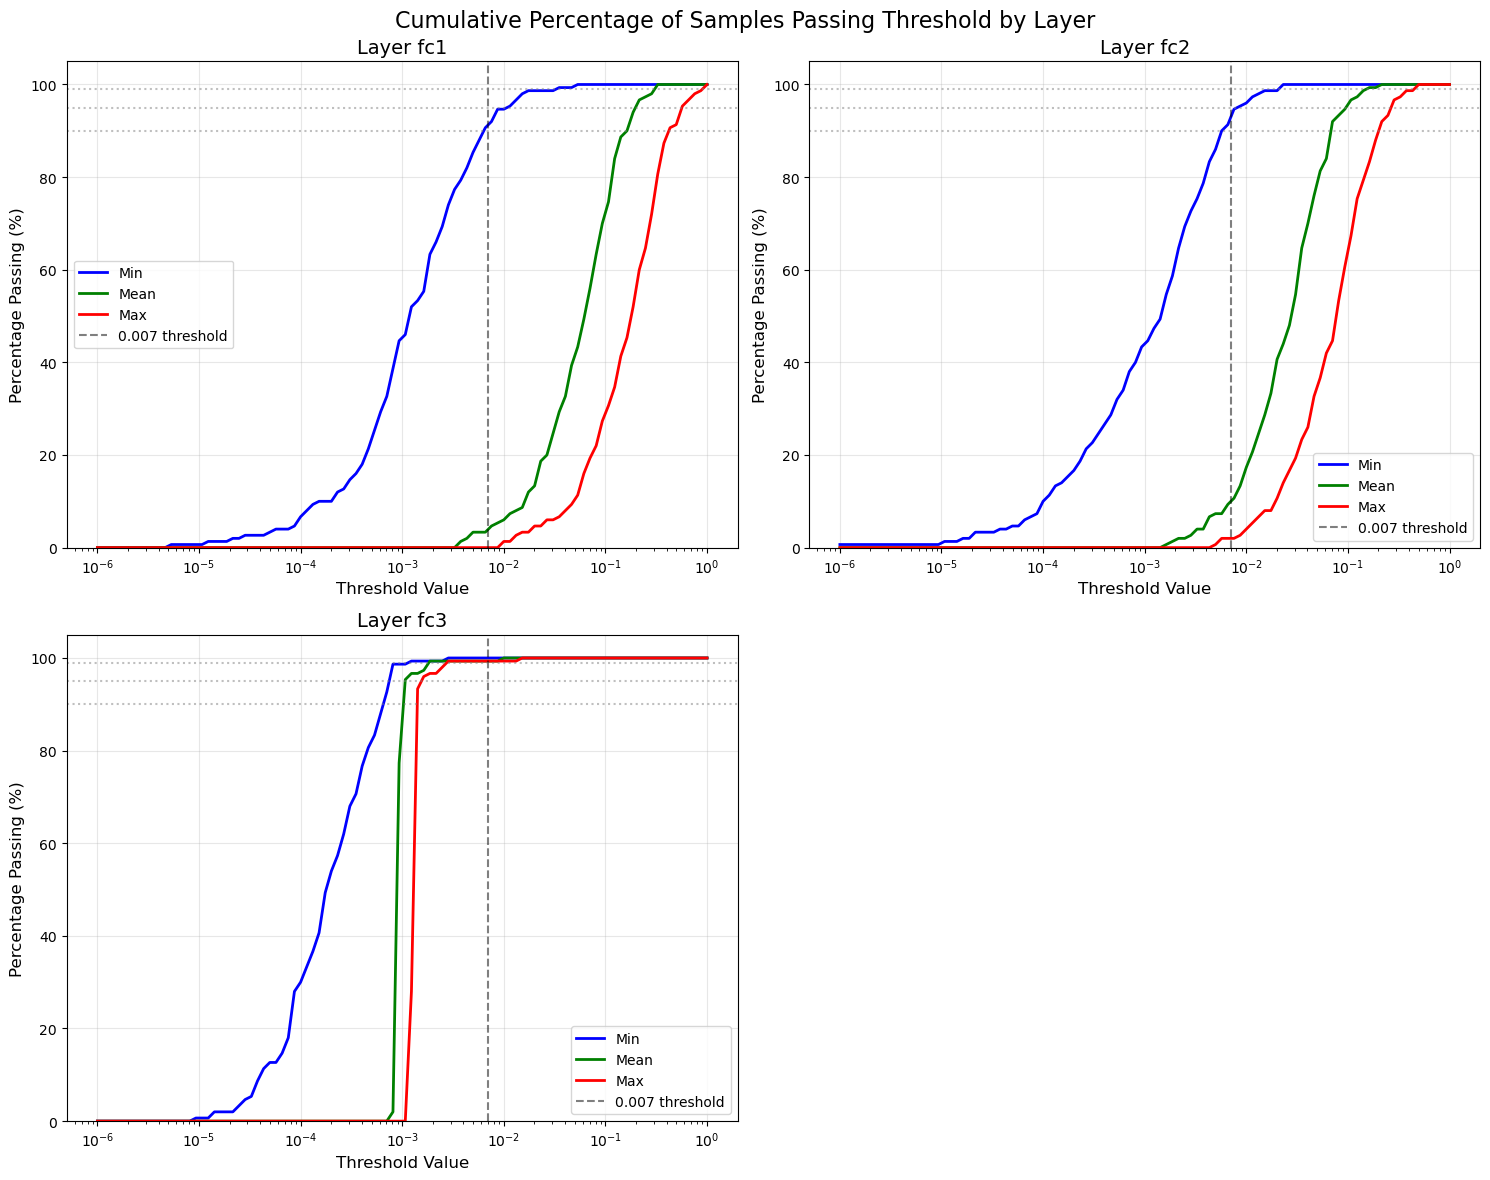


Threshold Analysis Table:
Layer  Threshold Min Pass % Mean Pass % Max Pass %
  fc1      0.001      46.0%        0.0%       0.0%
  fc1      0.005      85.3%        3.3%       0.0%
  fc1      0.007      90.7%        3.3%       0.0%
  fc1      0.010      94.7%        6.0%       1.3%
  fc1      0.050     100.0%       42.0%       9.3%
  fc1      0.100     100.0%       72.0%      30.0%
  fc2      0.001      44.0%        0.0%       0.0%
  fc2      0.005      86.7%        7.3%       0.7%
  fc2      0.007      93.3%        9.3%       2.0%
  fc2      0.010      96.0%       17.3%       4.0%
  fc2      0.050     100.0%       80.0%      35.3%
  fc2      0.100     100.0%       96.0%      64.0%
  fc3      0.001      98.7%       95.3%       0.0%
  fc3      0.005     100.0%       99.3%      99.3%
  fc3      0.007     100.0%       99.3%      99.3%
  fc3      0.010     100.0%      100.0%      99.3%
  fc3      0.050     100.0%      100.0%     100.0%
  fc3      0.100     100.0%      100.0%     100.0%


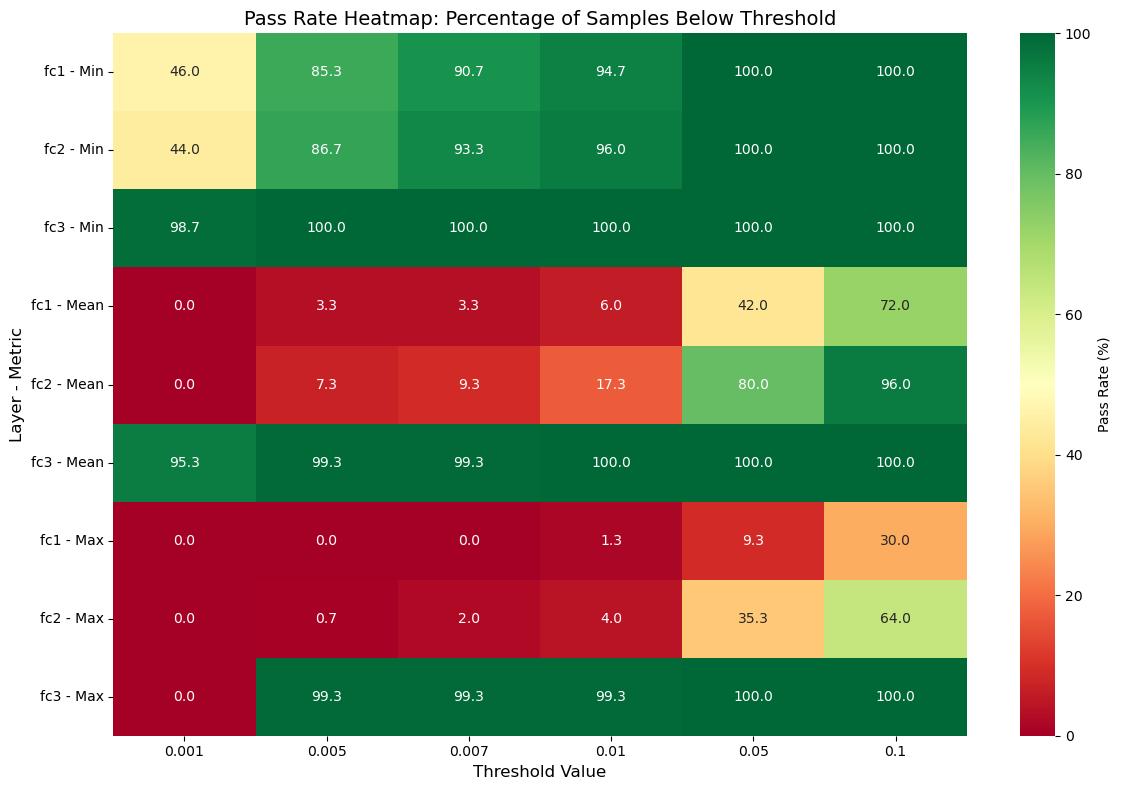

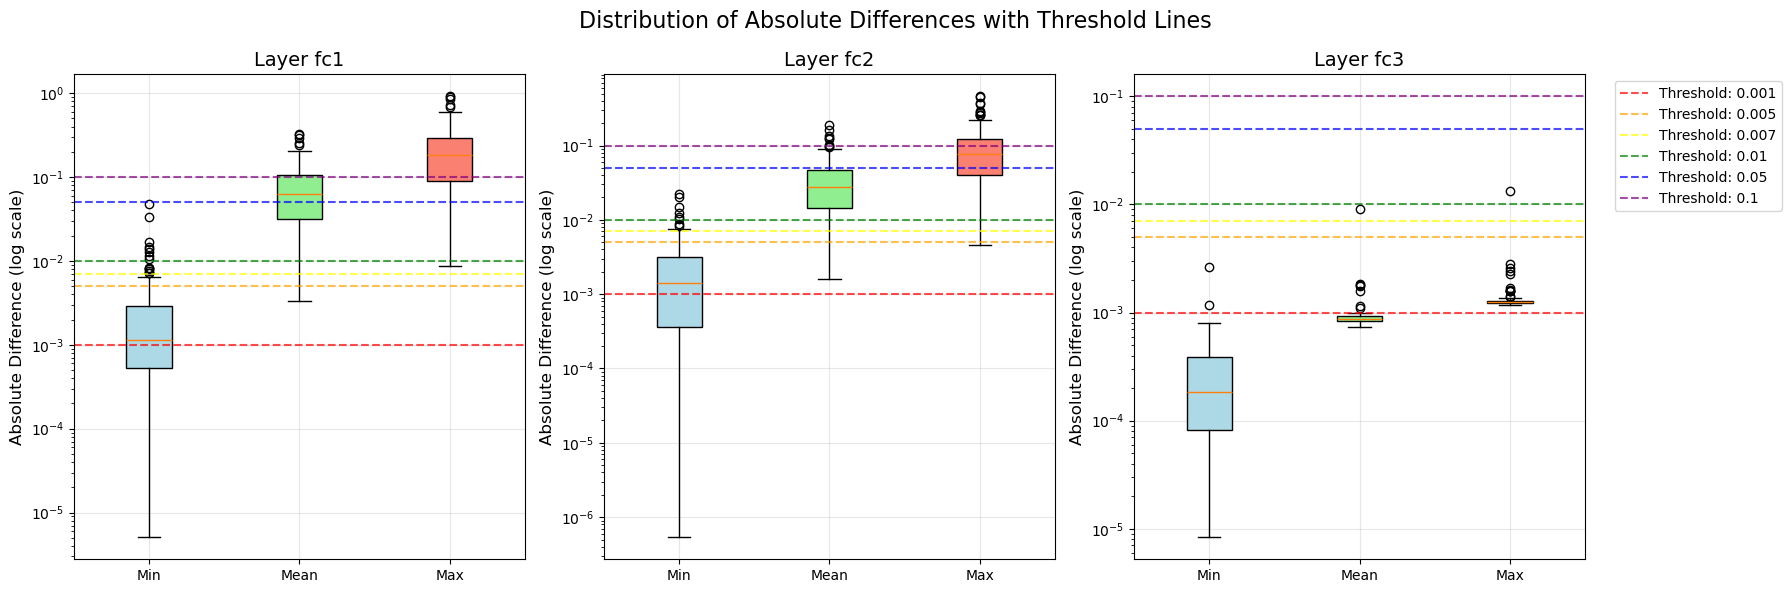


Summary Statistics for Threshold Selection:

Layer fc1:
----------------------------------------

Min Metric:
  Threshold for 90% pass rate: 0.006231
  Threshold for 95% pass rate: 0.009537
  Threshold for 99% pass rate: 0.025258
  Threshold for 99.9% pass rate: 0.045259

Mean Metric:
  Threshold for 90% pass rate: 0.157561
  Threshold for 95% pass rate: 0.193220
  Threshold for 99% pass rate: 0.307647
  Threshold for 99.9% pass rate: 0.324411

Max Metric:
  Threshold for 90% pass rate: 0.395837
  Threshold for 95% pass rate: 0.548616
  Threshold for 99% pass rate: 0.875119
  Threshold for 99.9% pass rate: 0.914604

Layer fc2:
----------------------------------------

Min Metric:
  Threshold for 90% pass rate: 0.005734
  Threshold for 95% pass rate: 0.007822
  Threshold for 99% pass rate: 0.017722
  Threshold for 99.9% pass rate: 0.022049

Mean Metric:
  Threshold for 90% pass rate: 0.065100
  Threshold for 95% pass rate: 0.093049
  Threshold for 99% pass rate: 0.149345
  Threshold fo

In [19]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the results
results = pd.read_csv('activation_diff_results2.csv')

# Define threshold values to test
thresholds = np.logspace(-6, 0, 100)  # From 1e-6 to 1 (0.000001 to 1)

# Create figure for cumulative distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Cumulative Percentage of Samples Passing Threshold by Layer', fontsize=16)

layers = ['fc1', 'fc2', 'fc3']
metrics = ['min_abs_diff', 'mean_abs_diff', 'max_abs_diff']
colors = {'min_abs_diff': 'blue', 'mean_abs_diff': 'green', 'max_abs_diff': 'red'}

# Plot for each layer
for idx, layer in enumerate(layers):
    ax = axes[idx//2, idx%2]
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Calculate percentage passing each threshold
        percentages = []
        for threshold in thresholds:
            passing = np.sum(values <= threshold) / len(values) * 100
            percentages.append(passing)
        
        # Plot cumulative distribution
        ax.semilogx(thresholds, percentages, 
                   label=metric.replace('_abs_diff', '').capitalize(),
                   color=colors[metric], linewidth=2)
    
    # Add reference lines for common thresholds
    ax.axvline(x=0.007, color='black', linestyle='--', alpha=0.5, label='0.007 threshold')
    ax.axhline(y=90, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(y=95, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(y=99, color='gray', linestyle=':', alpha=0.5)
    
    ax.set_xlabel('Threshold Value', fontsize=12)
    ax.set_ylabel('Percentage Passing (%)', fontsize=12)
    ax.set_title(f'Layer {layer}', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 105)

# Remove empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('cumulative_threshold_distribution3.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Create a detailed threshold analysis table
threshold_values = [0.001, 0.005, 0.007, 0.01, 0.05, 0.1]
analysis_results = []

for layer in layers:
    for threshold in threshold_values:
        row = {'Layer': layer, 'Threshold': threshold}
        
        for metric in metrics:
            column = f'{layer}_{metric}'
            values = results[column].values
            passing_percentage = np.sum(values <= threshold) / len(values) * 100
            row[f'{metric.replace("_abs_diff", "").capitalize()} Pass %'] = f'{passing_percentage:.1f}%'
        
        analysis_results.append(row)

# Create DataFrame and display
threshold_df = pd.DataFrame(analysis_results)
print("\nThreshold Analysis Table:")
print("="*80)
print(threshold_df.to_string(index=False))

# Save to CSV
threshold_df.to_csv('threshold_analysis.csv', index=False)

# %%
# Create a heatmap showing pass rates for different thresholds and layers
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = []
heatmap_labels = []

for metric in metrics:
    metric_data = []
    for layer in layers:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Calculate pass rates for each threshold
        pass_rates = []
        for threshold in threshold_values:
            passing = np.sum(values <= threshold) / len(values) * 100
            pass_rates.append(passing)
        
        metric_data.append(pass_rates)
    
    heatmap_data.extend(metric_data)
    heatmap_labels.extend([f'{layer} - {metric.replace("_abs_diff", "").capitalize()}' 
                          for layer in layers])

# Create heatmap
heatmap_array = np.array(heatmap_data)
sns.heatmap(heatmap_array, 
            xticklabels=[f'{t}' for t in threshold_values],
            yticklabels=heatmap_labels,
            annot=True, 
            fmt='.1f',
            cmap='RdYlGn',
            cbar_kws={'label': 'Pass Rate (%)'},
            vmin=0, vmax=100)

plt.title('Pass Rate Heatmap: Percentage of Samples Below Threshold', fontsize=14)
plt.xlabel('Threshold Value', fontsize=12)
plt.ylabel('Layer - Metric', fontsize=12)
plt.tight_layout()
plt.savefig('threshold_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Create box plots showing the distribution of differences for each layer
# with threshold lines overlaid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Absolute Differences with Threshold Lines', fontsize=16)

for idx, layer in enumerate(layers):
    ax = axes[idx]
    
    # Prepare data for box plot
    data_to_plot = []
    labels_to_plot = []
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        data_to_plot.append(results[column].values)
        labels_to_plot.append(metric.replace('_abs_diff', '').capitalize())
    
    # Create box plot
    bp = ax.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True)
    
    # Color the boxes
    colors_list = ['lightblue', 'lightgreen', 'salmon']
    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
    
    # Add threshold lines
    threshold_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    for thresh, color in zip(threshold_values, threshold_colors):
        ax.axhline(y=thresh, color=color, linestyle='--', alpha=0.7, 
                  label=f'Threshold: {thresh}')
    
    ax.set_yscale('log')
    ax.set_ylabel('Absolute Difference (log scale)', fontsize=12)
    ax.set_title(f'Layer {layer}', fontsize=14)
    ax.grid(True, alpha=0.3)
    
    # Only show legend on the last subplot
    if idx == 2:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('distribution_with_thresholds.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Summary statistics for threshold selection
print("\nSummary Statistics for Threshold Selection:")
print("="*80)

for layer in layers:
    print(f"\nLayer {layer}:")
    print("-"*40)
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Find threshold for different pass rates
        pass_rates = [90, 95, 99, 99.9]
        print(f"\n{metric.replace('_abs_diff', '').capitalize()} Metric:")
        
        for rate in pass_rates:
            threshold_for_rate = np.percentile(values, rate)
            print(f"  Threshold for {rate}% pass rate: {threshold_for_rate:.6f}")
